[CDC - Observations Germany](https://opendata.dwd.de/climate_environment/CDC/observations_germany/)

# Wind data
[Wind historical](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/10_minutes/wind/historical/) </br>
[Wind recent](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/10_minutes/wind/recent/) </br></br>
[Extreme Wind historical](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/10_minutes/extreme_wind/historical/) </br>
[Extreme Wind recent](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/10_minutes/extreme_wind/recent/)

# Precipitation data
[Precipitation historical](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/10_minutes/precipitation/historical/) </br>
[Precipitation recent](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/10_minutes/precipitation/recent/)

In [32]:
import os
import requests
from bs4 import BeautifulSoup as bs
import zipfile


# not all data are available in every temporal resolution!
DATA = [
    # 'air_temperature',
    # 'cloud_type',
    # 'cloudiness',
    # 'dew_point',
    'extreme_wind',
    # 'moisture',
    'precipitation',
    # 'pressure',
    # 'soil',
    # 'soil_temperature',
    # 'solar',
    # 'sun',
    # 'standard_format',
    # 'visibility',
    # 'weather_phenomena',
    'wind',
    # 'wind_test',
    # 'wind_synop',
]

TEMPORAL_RES = [
    # '1_minute',
    '10_minutes',
    # 'hourly',
    # 'subdaily',
    # 'daily',
    # 'monthly',
    # 'annual',
    # 'multi_annual',
]

PERIOD = [
    # '1991',
    # '2000 - 2009',
    '2010 - 2019',
    '2020 - 2021',
    'recent',
]

STATIONS_ID = [
    '691',
]

ROOT_URL = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/"

DOWNLOAD_DIR = os.path.join(os.curdir, "downloads", "DeutscherWetterdienst", "")

# make target directory, if it doesn't exist
if not os.path.exists(DOWNLOAD_DIR):
    os.mkdir(DOWNLOAD_DIR)

# ensure that the id has 5 digits
for i, s_id in enumerate(STATIONS_ID):
    while len(s_id) < 5:
        s_id = '0' + s_id
    STATIONS_ID[i] = s_id

# get urls to search for downloadable data
urls_root = []
for temp_res in TEMPORAL_RES:
    for dat in DATA:
        if 'recent' in PERIOD:
            urls_root.append(ROOT_URL + temp_res + '/' + dat + '/' + 'recent' + '/')
        if len(PERIOD) > 1 or PERIOD[0] != 'recent':
            urls_root.append(ROOT_URL + temp_res + '/' + dat + '/' + 'historical' + '/')

# get relevant years, 'akt' for recent data 
years = [y.split(' - ')[0] for y in PERIOD]
if 'recent' in PERIOD:
    years.append('akt')

# get urls and names of desired files
urls = []
names = []
for url in urls_root:
    # get html of website
    r = requests.get(url)
    soup = bs(r.text)
    # find download links and filter for .zip files, station and relevant time periods
    for i, link in enumerate(soup.findAll('a')):
        if '.zip' in str(link) and any([station in str(link) for station in STATIONS_ID]) and any([year in str(link) for year in years]):
            url_download = url + link.get('href')
            urls.append(url_download)
            names.append(soup.select('a')[i].attrs['href'])

names_urls = zip(names, urls)

# download files
for name, url in names_urls:
    
    file_path = os.path.join(DOWNLOAD_DIR, name)
    file_path_txt = os.path.join(DOWNLOAD_DIR, name.split('.')[0] + '.txt')
    if not os.path.isfile(file_path) and not os.path.isfile(file_path_txt):
        response = requests.get(url, timeout=50)
        with open(file_path, 'wb') as f:
            f.write(response.content)

        # unzip file
        if os.path.isfile(file_path):
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                zip_ref.extractall(DOWNLOAD_DIR)

    # delete .zip
    if os.path.isfile(file_path):
        os.remove(file_path)


In [3]:
import pandas as pd

In [4]:
df_wind = pd.read_csv("DeutscherWetterDienst/produkt_zehn_min_fx_20200829_20220301_00691.txt", sep=';')
print(df_wind.shape)
df_wind.head()

(79200, 8)


,STATIONS_ID,MESS_DATUM,QN,FX_10,FNX_10,FMX_10,DX_10,eor
0,691,202008290000,3,2.1,1.0,1.6,200,eor
1,691,202008290010,3,2.1,1.0,1.5,190,eor
2,691,202008290020,3,2.1,1.0,1.5,180,eor
3,691,202008290030,3,2.1,1.0,1.6,150,eor
4,691,202008290040,3,2.6,1.5,2.0,160,eor


In [5]:
df_wind = pd.read_csv("DeutscherWetterDienst/produkt_zehn_min_ff_20200829_20220301_00691.txt", sep=';')
print(df_wind.shape)
df_wind.head()

(79200, 6)


,STATIONS_ID,MESS_DATUM,QN,FF_10,DD_10,eor
0,691,202008290000,3,1.5,190,eor
1,691,202008290010,3,1.4,190,eor
2,691,202008290020,3,1.5,190,eor
3,691,202008290030,3,1.6,170,eor
4,691,202008290040,3,2.0,160,eor


In [6]:
df_precipitation = pd.read_csv("DeutscherWetterDienst/produkt_zehn_min_rr_20200829_20220301_00691.txt", sep=';')
print(df_precipitation.shape)
df_precipitation.head()

(79200, 7)


,STATIONS_ID,MESS_DATUM,QN,RWS_DAU_10,RWS_10,RWS_IND_10,eor
0,691,202008290000,3,0,0.0,0,eor
1,691,202008290010,3,0,0.0,0,eor
2,691,202008290020,3,0,0.0,0,eor
3,691,202008290030,3,0,0.0,0,eor
4,691,202008290040,3,0,0.0,0,eor


In [12]:


df_wind_2 = pd.read_csv("DeutscherWetterDienst/produkt_zehn_min_ff_20000101_20091231_00691.txt", sep=';')
print(df_wind_2.shape)
df_wind_2.head()

(523544, 6)


,STATIONS_ID,MESS_DATUM,QN,FF_10,DD_10,eor
0,691,199912312300,1,2.5,170,eor
1,691,199912312310,1,2.8,180,eor
2,691,199912312320,1,2.9,180,eor
3,691,199912312330,1,2.7,180,eor
4,691,199912312340,1,2.5,180,eor


In [13]:
df_wind_2.describe()

,STATIONS_ID,MESS_DATUM,QN,FF_10,DD_10
count,523544.0,5.235440e+05,523544.000000,523544.000000,523544.000000
mean,691.0,2.004575e+11,1.233552,0.014277,188.496560
std,0.0,2.869277e+08,0.641145,64.476138,114.913603
min,691.0,1.999123e+11,1.000000,-999.000000,-999.000000
25%,691.0,2.002071e+11,1.000000,2.500000,120.000000
50%,691.0,2.005010e+11,1.000000,3.800000,210.000000
75%,691.0,2.007070e+11,1.000000,5.500000,260.000000
max,691.0,2.009123e+11,3.000000,21.900000,360.000000


<AxesSubplot:xlabel='MESS_DATUM', ylabel='FF_10'>

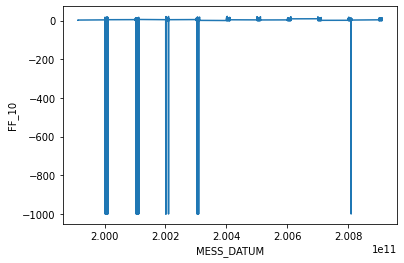

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=df_wind_2, x='MESS_DATUM', y='FF_10')